In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UNDER_CONSTRUCTION,29451.0,0.179756,3.839908e-01,0.000000,0.000000,0.000000,0.000000,1.000000e+00
RERA,29451.0,0.317918,4.656753e-01,0.000000,0.000000,0.000000,1.000000,1.000000e+00
BHK_NO.,29451.0,2.392279,8.790913e-01,1.000000,2.000000,2.000000,3.000000,2.000000e+01
SQUARE_FT,29451.0,19802.170190,1.901335e+06,3.000000,900.021130,1175.056750,1550.688124,2.545455e+08
READY_TO_MOVE,29451.0,0.820244,3.839908e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+00
RESALE,29451.0,0.929578,2.558613e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+00
LONGITUDE,29451.0,21.300255,6.205306e+00,-37.713008,18.452663,20.750000,26.900926,5.991288e+01
LATITUDE,29451.0,76.837695,1.055775e+01,-121.761248,73.798100,77.324137,77.828740,1.529627e+02
TARGET(PRICE_IN_LACS),29451.0,142.898746,6.568807e+02,0.250000,38.000000,62.000000,100.000000,3.000000e+04


In [4]:
#Visualization and feature engineering
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [5]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [6]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [7]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [8]:
df = df.rename(columns = {"BHK_NO.":"BHK_NO","TARGET(PRICE_IN_LACS)":"Targetprice"})

In [9]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'Targetprice'],
      dtype='object')

<AxesSubplot:xlabel='SQUARE_FT'>

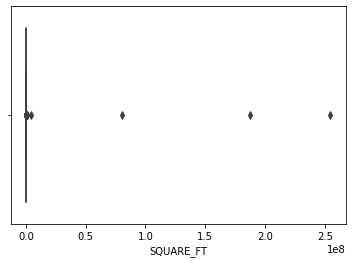

In [10]:
#handling Outlier
sns.boxplot(x=df['SQUARE_FT'])

In [11]:
#300 is set as lower limit, due to norms defined by government
df.drop(df[(df['SQUARE_FT']<300)].index,inplace=True)
#10000 sqft is set as higher limit is because the assuming the price prediciton for residential plots 
df.drop(df[(df['SQUARE_FT']>10000)].index,inplace=True)

<AxesSubplot:xlabel='SQUARE_FT'>

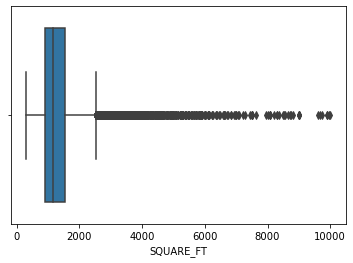

In [12]:
sns.boxplot(x=df['SQUARE_FT'])

In [13]:
df['POSTED_BY'] = df['POSTED_BY'].map({'Dealer': 1, 'Owner': 2,'Builder':3})

In [14]:
df['BHK']=df['BHK_OR_RK'].apply(lambda x : 1 if "BHK" in x else 0)

In [15]:
df['RK']=df['BHK_OR_RK'].apply(lambda x : 1 if "RK" in x else 0)

In [16]:
df.drop(columns='BHK_OR_RK',inplace = True)

In [17]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO', 'SQUARE_FT',
       'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE', 'LATITUDE',
       'Targetprice', 'BHK', 'RK'],
      dtype='object')

<Figure size 1440x1440 with 0 Axes>

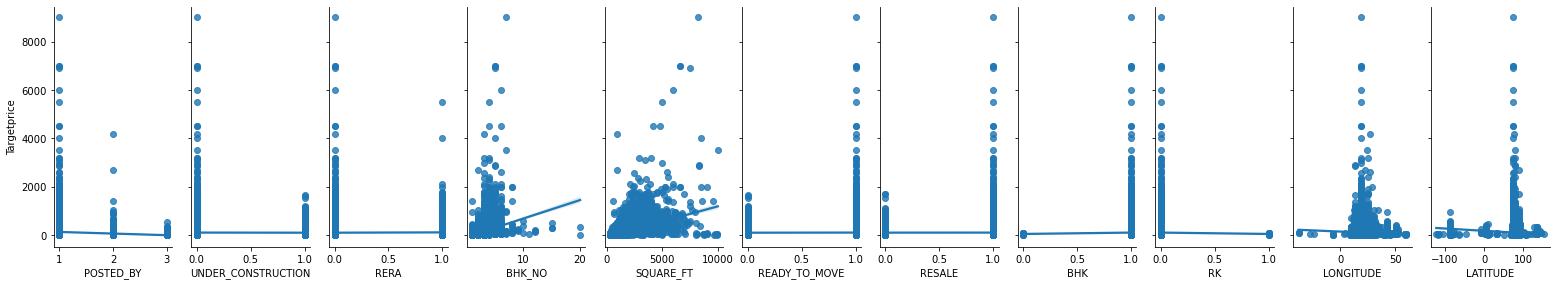

In [18]:
plt.figure(figsize=(20,20))
sns.pairplot(df,x_vars=['POSTED_BY','UNDER_CONSTRUCTION','RERA','BHK_NO','SQUARE_FT','READY_TO_MOVE','RESALE','BHK','RK','LONGITUDE','LATITUDE'],y_vars='Targetprice',height = 4,aspect = 0.5,kind='reg')

In [19]:
#dropping address since we have latitude and longitude
df.drop(columns=['ADDRESS'],inplace=True)

In [20]:
df['BHK_NO'].value_counts()

2     13247
3     10455
1      3491
4      1706
5       186
6        47
8        10
7        10
12        3
9         3
10        3
15        3
20        2
11        1
Name: BHK_NO, dtype: int64

In [21]:
#assuming more than 6bhk is more than normal residential home
df.drop(df[(df['BHK_NO']>6)].index,inplace=True)

<Figure size 1440x1440 with 0 Axes>

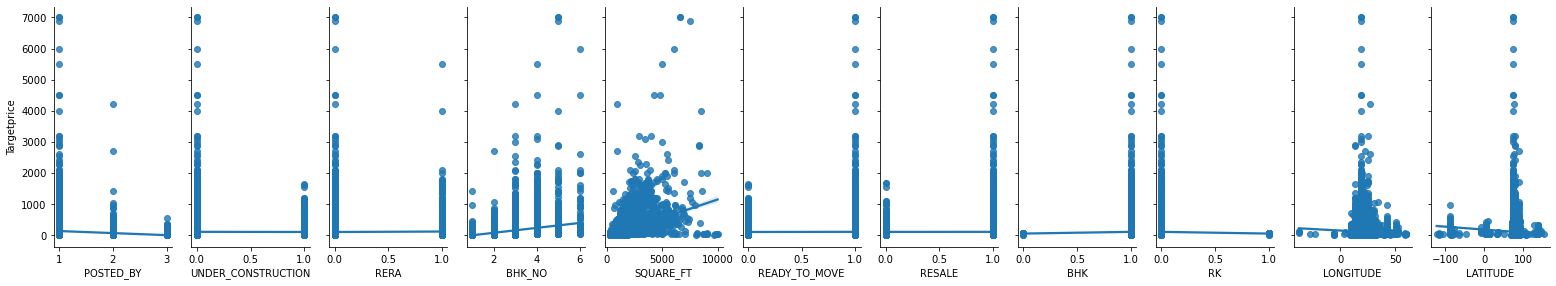

In [22]:
plt.figure(figsize=(20,20))
sns.pairplot(df,x_vars=['POSTED_BY','UNDER_CONSTRUCTION','RERA','BHK_NO','SQUARE_FT','READY_TO_MOVE','RESALE','BHK','RK','LONGITUDE','LATITUDE'],y_vars='Targetprice',height = 4,aspect = 0.5,kind='reg')

<AxesSubplot:>

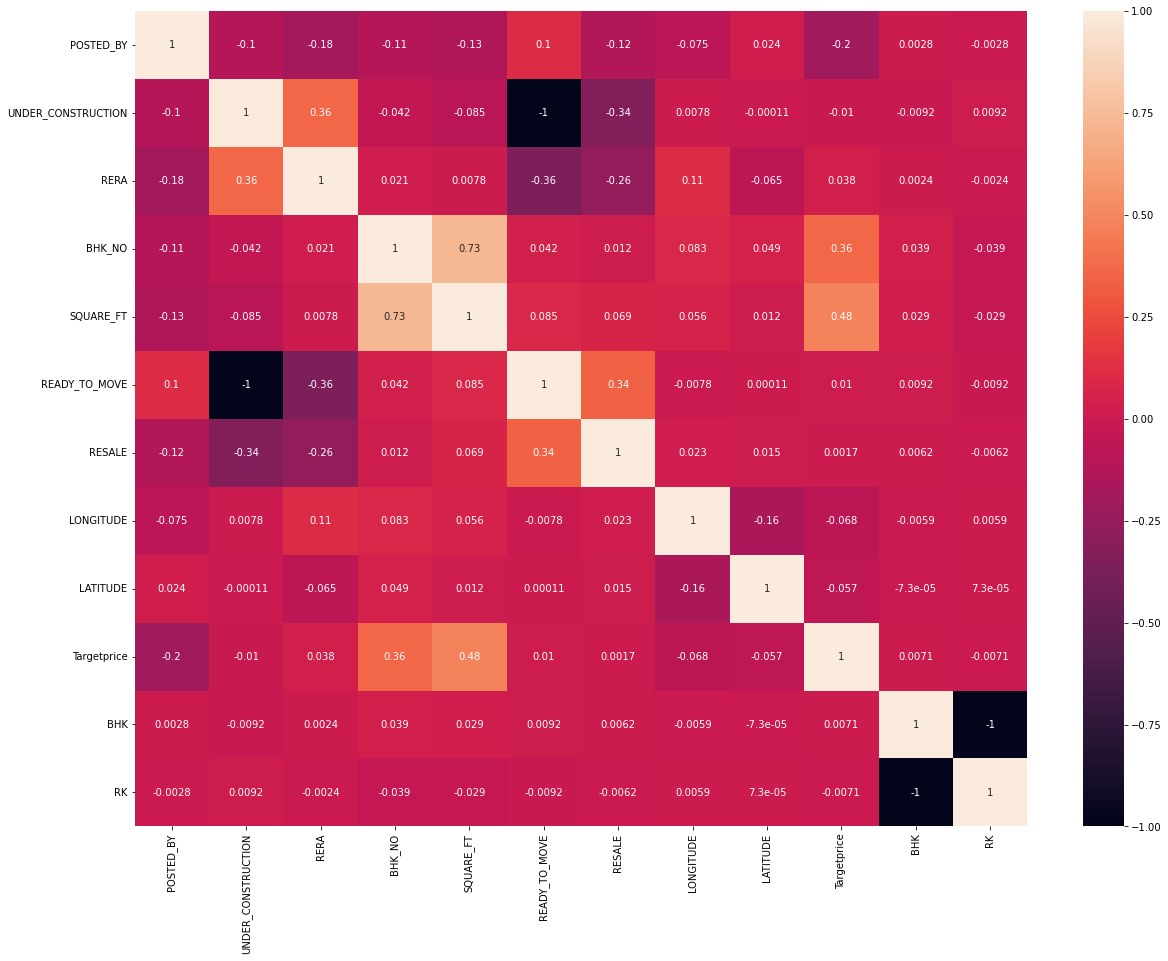

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(data=df.corr(), annot=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29132 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           29132 non-null  int64  
 1   UNDER_CONSTRUCTION  29132 non-null  int64  
 2   RERA                29132 non-null  int64  
 3   BHK_NO              29132 non-null  int64  
 4   SQUARE_FT           29132 non-null  float64
 5   READY_TO_MOVE       29132 non-null  int64  
 6   RESALE              29132 non-null  int64  
 7   LONGITUDE           29132 non-null  float64
 8   LATITUDE            29132 non-null  float64
 9   Targetprice         29132 non-null  float64
 10  BHK                 29132 non-null  int64  
 11  RK                  29132 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 2.9 MB


<AxesSubplot:xlabel='RERA', ylabel='count'>

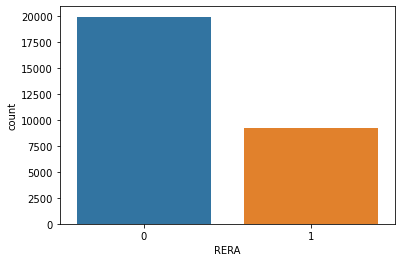

In [25]:
sns.countplot(x=df['RERA'])

<AxesSubplot:xlabel='BHK_NO', ylabel='count'>

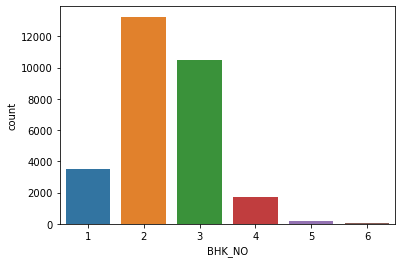

In [26]:
sns.countplot(x=df['BHK_NO'])

<AxesSubplot:xlabel='RERA', ylabel='count'>

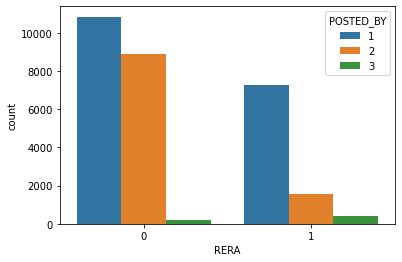

In [27]:
sns.countplot(x=df['RERA'],hue=df['POSTED_BY'])

<AxesSubplot:xlabel='BHK_NO', ylabel='count'>

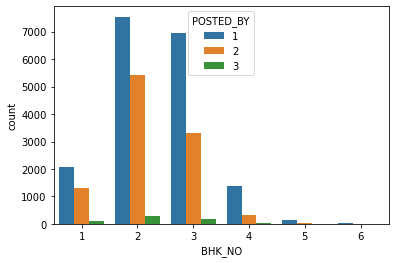

In [28]:
sns.countplot(x=df['BHK_NO'],hue=df['POSTED_BY'])

<AxesSubplot:xlabel='READY_TO_MOVE', ylabel='count'>

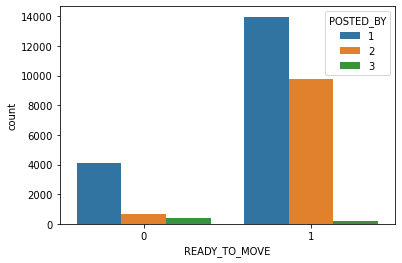

In [29]:
sns.countplot(x=df['READY_TO_MOVE'],hue=df['POSTED_BY'])

<AxesSubplot:xlabel='UNDER_CONSTRUCTION', ylabel='count'>

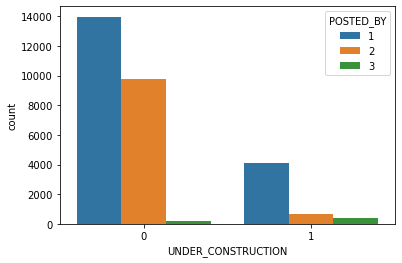

In [30]:
sns.countplot(x=df['UNDER_CONSTRUCTION'],hue=df['POSTED_BY'])

<AxesSubplot:xlabel='RESALE', ylabel='count'>

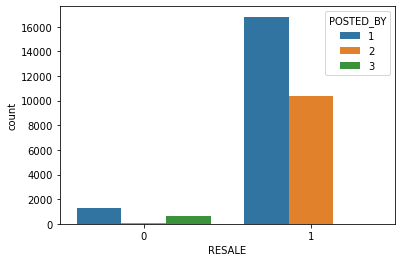

In [31]:
sns.countplot(x=df['RESALE'],hue=df['POSTED_BY'])

In [32]:
X= df.drop(columns=df[['Targetprice',"LONGITUDE","LATITUDE","BHK","RK"]])

In [33]:
Y=df['Targetprice']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
LR = LinearRegression()

In [38]:
LR.fit(X_train,Y_train)

LinearRegression()

In [39]:
Y_pred = LR.predict(X_test)

In [40]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [41]:
print("R2 Score:",r2_score(Y_test,Y_pred))
print("Mean Absolute Error:",mean_absolute_error(Y_test,Y_pred))
print("Mean Squared Error:",mean_squared_error(Y_test,Y_pred))

R2 Score: 0.27629782295952066
Mean Absolute Error: 61.51316662143888
Mean Squared Error: 17284.386579537295


In [42]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(random_state = 0)
DT.fit(X_train,Y_train)
Y_pred = DT.predict(X_test)

In [43]:
print("R2 Score:",r2_score(Y_test,Y_pred))
print("Mean Absolute Error:",mean_absolute_error(Y_test,Y_pred))
print("Mean Squared Error:",mean_squared_error(Y_test,Y_pred))

R2 Score: 0.03590505061789395
Mean Absolute Error: 55.45377183434474
Mean Squared Error: 23025.756081935477


In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth' : [1,2,3,4,5,6,7],
    'min_samples_leaf' : [1,2,3,4,5],
    'max_features' : [2,3,4,5,6,7]
}
estimator = DecisionTreeRegressor(random_state = 0)

In [45]:
best_model = GridSearchCV(estimator,param_grid,cv=5)

In [46]:
best_model.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [47]:
best_model.best_estimator_

DecisionTreeRegressor(max_depth=6, max_features=5, min_samples_leaf=5,
                      random_state=0)

In [48]:
best_model.best_params_

{'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 5}

In [51]:
DTC= DecisionTreeRegressor(max_depth= 6, max_features= 5, min_samples_leaf= 5)

In [52]:
DTC.fit(X_train,Y_train)
Y_pred = DTC.predict(X_test)

In [53]:
print("R2 Score:",r2_score(Y_test,Y_pred))
print("Mean Absolute Error:",mean_absolute_error(Y_test,Y_pred))
print("Mean Squared Error:",mean_squared_error(Y_test,Y_pred))

R2 Score: 0.1080743027342681
Mean Absolute Error: 56.59110803911754
Mean Squared Error: 21302.117142728956
